In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [12]:

# Read the CSV file
df = pd.read_csv('Alignment-HitTable.csv', header=None)
df.columns = [
    'query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 
    'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score'
]

# Select only numeric columns for analysis
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
corr = numeric_df.corr()

# Describe the DataFrame
results = df.describe()



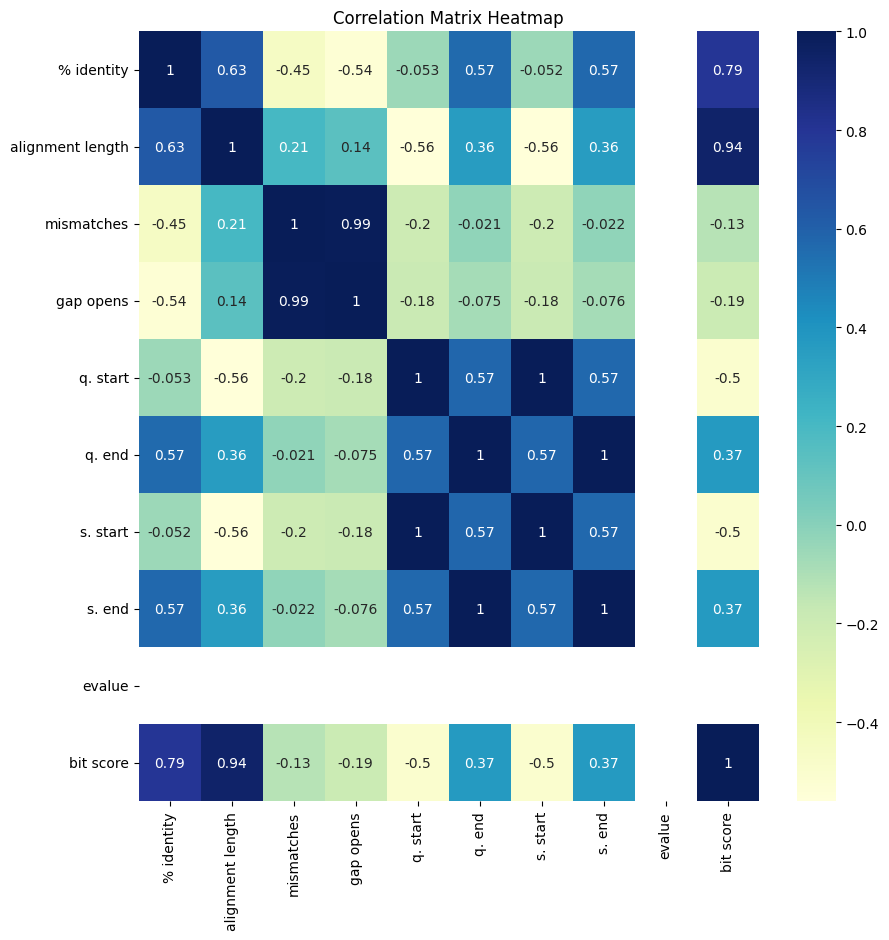

In [13]:
# Plot the heatmap for the correlation matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix Heatmap')
plt.show()



In [14]:
# Select numeric columns for PCA
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_numeric)

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame for the principal components
components = pd.DataFrame(pca.components_, index=['Component 1', 'Component 2'], columns=df_numeric.columns)




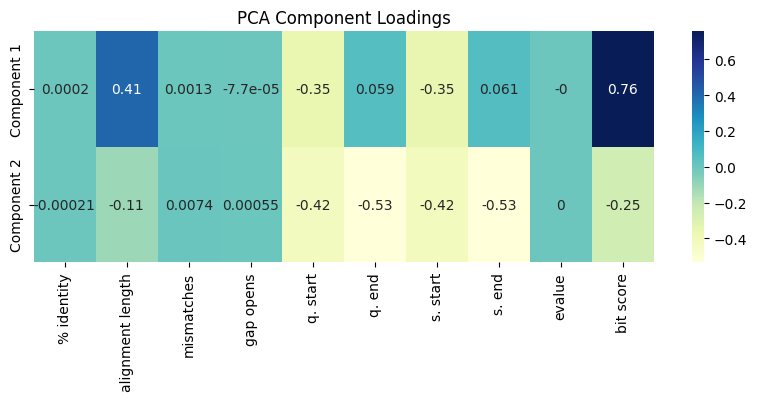

In [15]:
# Generate heatmap for PCA components
fig, ax = plt.subplots(figsize=(10, 3))
sns.heatmap(components, annot=True, cmap='YlGnBu')
plt.title('PCA Component Loadings')
plt.show()

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
y_pred = kmeans.fit_predict(df_numeric)



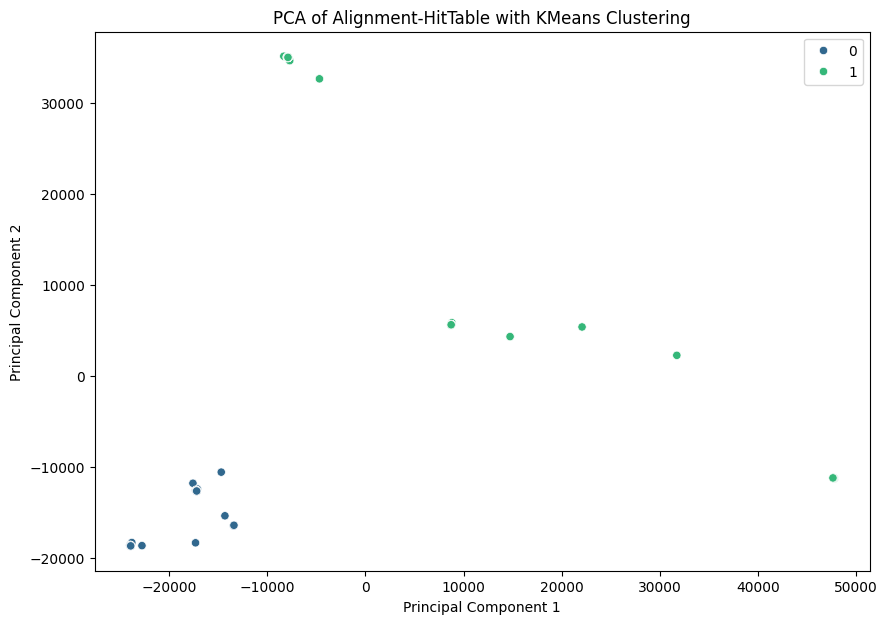

In [16]:
# Plot the PCA results with KMeans clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=y_pred, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Alignment-HitTable with KMeans Clustering')
plt.show()